In [4]:
import torch
import numpy as np
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import DataLoader
import sys

from itertools import cycle
from tqdm.auto import trange
from tqdm.notebook import tqdm

sys.path.append('../')
from matplotlib import cm
import matplotlib.pyplot as plt

from utils import plot_utils, s3w_utils, vmf_utils, utils
from utils.nf import normalizing_flows
from methods import s3wd, sswd, swd

from experiments import gf_particles, gd_sphere

from scipy.stats import gaussian_kde

device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

ImportError: cannot import name 's3wd' from 'methods' (/home/tranh4/Projects/s3w/s3wd/src/methods/__init__.py)

In [5]:
mu_target = [0,1,0]
mu_target = mu_target / np.linalg.norm(mu_target)

kappa_target = 10

X_target = torch.tensor(vmf_utils.rand_vmf(mu_target, kappa=kappa_target, N=10000), dtype=torch.float)


## Gradient Flow on Particles

In [6]:
X0 = torch.randn((500, 3), device=device)
X0 = F.normalize(X0, p=2, dim=-1)
X0.requires_grad_(True)
L = [X0.clone()]
L_loss = []

In [3]:
d_func = s3w.ari_s3wd 
d_args = {'p': 2, 'n_projs': 100, 'device': device, 'n_rotations': 50}

L, L_loss1 = gf_particles.run_exp(X_target, X0, d_func , d_args, device, n_steps=1001, lr=1, batch_size=500)

AttributeError: module 'methods.s3w' has no attribute 'ari_s3wd'

In [9]:
d_func = s3w.ri_s3wd 
d_args = {'p': 2, 'n_projs': 100, 'device': device, 'n_rotations': 2}

L, L_loss2 = gf_particles.run_exp(X_target, X0, d_func , d_args, device, n_steps=1001, lr=1, batch_size=500)

100%|██████████| 1001/1001 [00:05<00:00, 197.66it/s, Loss = 0.473]


In [10]:
d_func = s3w.ri_s3wd 
d_args = {'p': 2, 'n_projs': 100, 'device': device, 'n_rotations': 5}

L, L_loss5 = gf_particles.run_exp(X_target, X0, d_func , d_args, device, n_steps=1001, lr=1, batch_size=500)

100%|██████████| 1001/1001 [00:06<00:00, 152.00it/s, Loss = 0.349]


In [11]:
d_func = s3w.ri_s3wd 
d_args = {'p': 2, 'n_projs': 100, 'device': device, 'n_rotations': 10}

L, L_loss10 = gf_particles.run_exp(X_target, X0, d_func , d_args, device, n_steps=1001, lr=1, batch_size=500)

100%|██████████| 1001/1001 [00:08<00:00, 118.97it/s, Loss = 0.404]


In [12]:
d_func = s3w.ri_s3wd 
d_args = {'p': 2, 'n_projs': 100, 'device': device, 'n_rotations': 50}

L, L_loss50 = gf_particles.run_exp(X_target, X0, d_func , d_args, device, n_steps=1001, lr=1, batch_size=500)

100%|██████████| 1001/1001 [00:21<00:00, 46.09it/s, Loss = 0.350]


In [13]:
d_func = s3w.ri_s3wd 
d_args = {'p': 2, 'n_projs': 100, 'device': device, 'n_rotations': 100}

L, L_loss100 = gf_particles.run_exp(X_target, X0, d_func , d_args, device, n_steps=1001, lr=1, batch_size=500)

100%|██████████| 1001/1001 [00:39<00:00, 25.32it/s, Loss = 0.427]


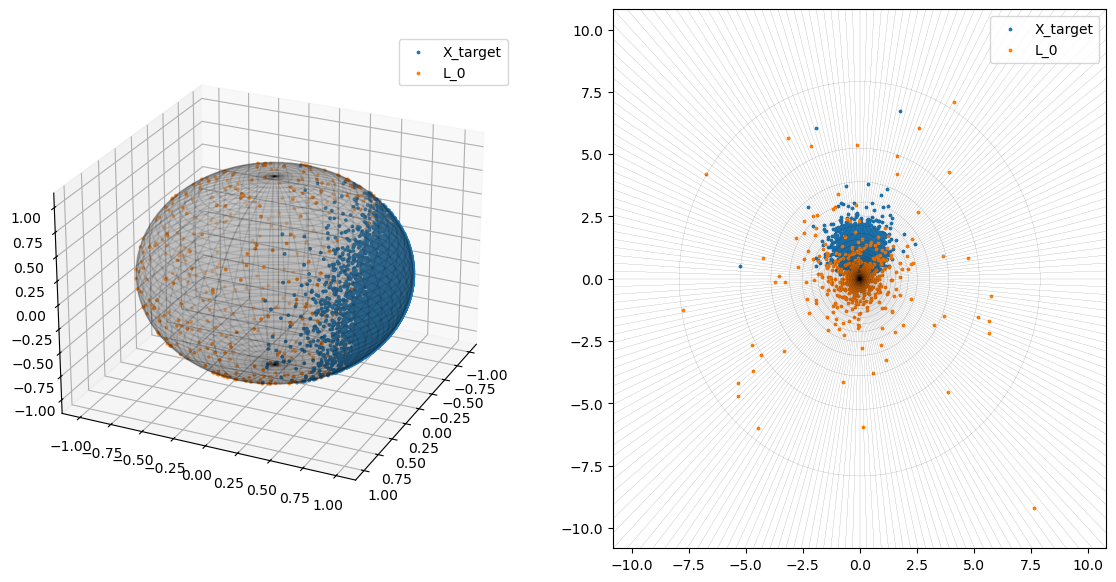

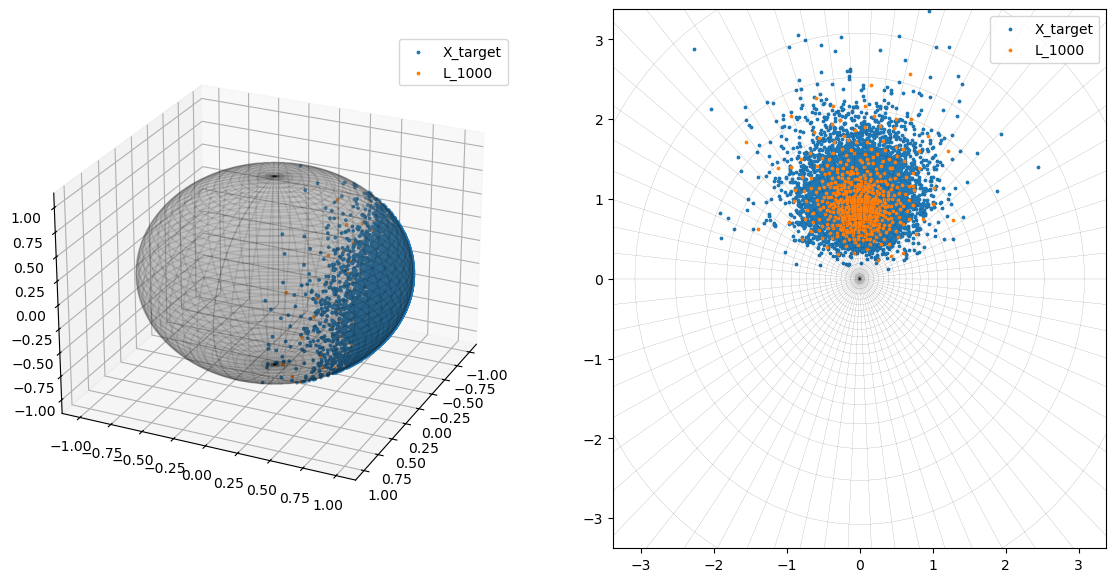

In [18]:
for k in [0, 1000]:
    X_target_cpu = X_target.cpu().detach().numpy()
    L_k_cpu = L[k].cpu().detach().numpy()

    datasets = [X_target_cpu, L_k_cpu]
    labels = ['X_target', f'L_{k}']

    plot_utils.plot_all(datasets, labels, view_init=(25, 25))

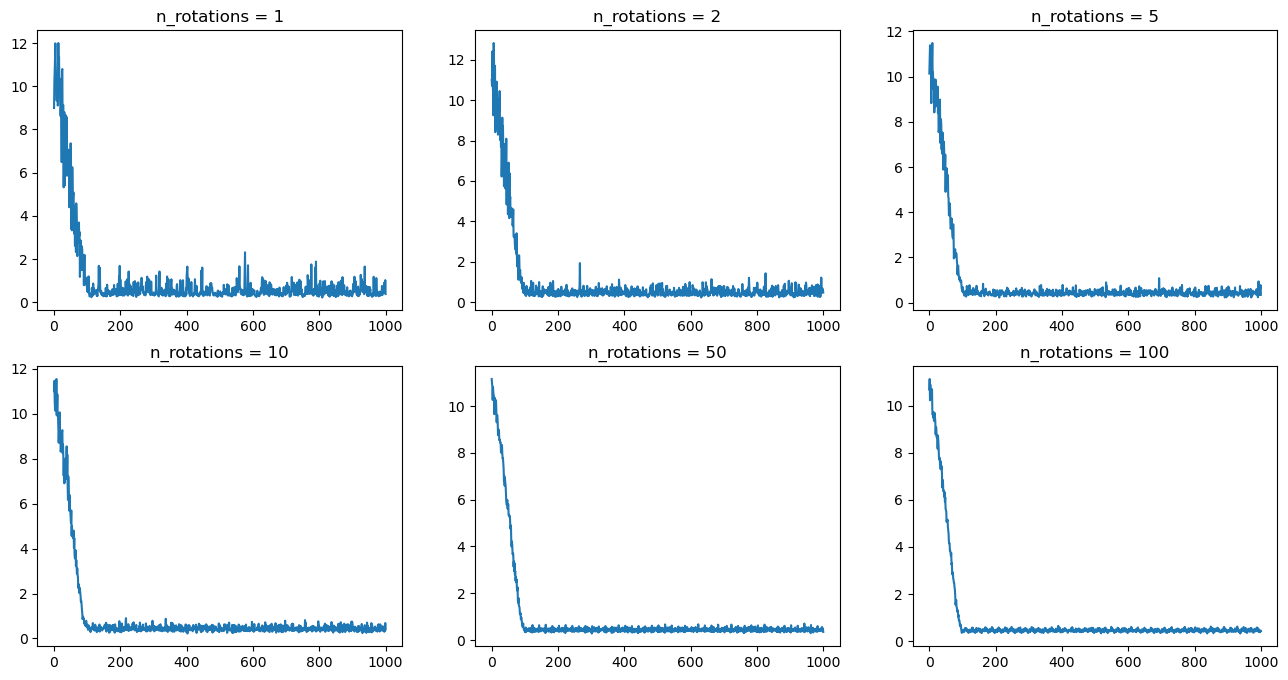

In [17]:
# Create plots of the 6 different loss curves
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
ax[0, 0].plot(L_loss1)
ax[0, 0].set_title('n_rotations = 1')
ax[0, 1].plot(L_loss2)
ax[0, 1].set_title('n_rotations = 2')
ax[0, 2].plot(L_loss5)
ax[0, 2].set_title('n_rotations = 5')
ax[1, 0].plot(L_loss10)
ax[1, 0].set_title('n_rotations = 10')
ax[1, 1].plot(L_loss50)
ax[1, 1].set_title('n_rotations = 50')
ax[1, 2].plot(L_loss100)
ax[1, 2].set_title('n_rotations = 100')
plt.savefig('gf_loss_curves.png')
plt.show()